In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments=pd.read_csv('C:/Users/wpric/Documents/Data Science/1-Youtube Text Data Analysis/UScomments.csv',error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\wpric\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('He happy cause he in a movie..').sentiment.polarity

0.8

In [7]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity']=polarity

In [11]:
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


Positive Sentiment Analysis Using WordCloud

In [12]:
comments_positive=comments[comments['polarity']==1]

In [13]:
comments_positive.shape

(19390, 5)

In [14]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
stopwords=set(STOPWORDS)

In [18]:
total_comments=''.join(comments_positive['comment_text'])

In [19]:
wordcloud=WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

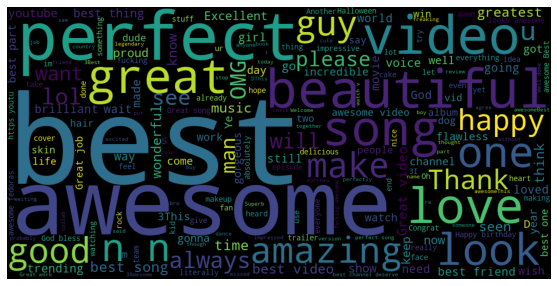

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Negative Sentiment Analysis WordCloud

In [21]:
comments_negative=comments[comments['polarity']==-1]

In [22]:
comments_negative.shape

(3508, 5)

In [23]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [24]:
total_comments=''.join(comments_negative['comment_text'])

In [25]:
wordcloud=WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

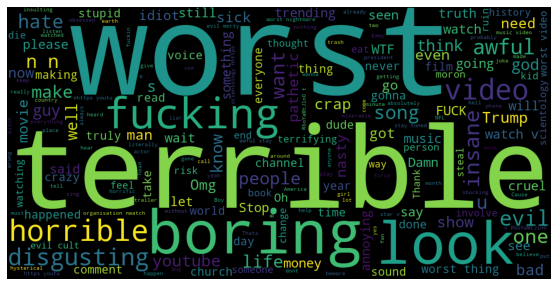

In [26]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Trending Tags Analysis

In [27]:
videos=pd.read_csv('C:/Users/wpric/Documents/Data Science/1-Youtube Text Data Analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [28]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [29]:
tags_complete=' '.join(videos['tags'])

In [30]:
tags_complete

my|jimmy kimmel|jimmy kimmel live|late night|talk show|funny|comedic|comedy|clip|comedian|mean tweets|bodak yellow|cardi b|music|hip hop|trap music|rap music|new music|single|live music|concert cupcake|cupcakes|cake|cakes|bake|bakes|baking|home made|recipe|how to make|caramels|caramel|salted caramel|chocolate|couverture chocolate|chocolate caramels|reisen chocolate chews|chews|chewy|chewy sweets|sweets|candy making|candy|thermometre|sugar|sea salt|maldon sea salt|gidt ideas|home made gifts|wrapped candies|cupcake jemma|crumbs and doilies|london Exclusive Content|Digital Exclusive|Coach Exclusive|Behind The Voice|The Voice|Adam Levine|Blake Shelton|Kelly Clarkson|Alicia Keys|The Voice Season 14|the voice|the voice nbc|the voice season 13|the voice new season|The Voice 2017|The Voice USA|The Voice Season 13|The voice winners|adam levine|jennifer hudson|miley cyrus|blake shelton|carson daly|the voice auditions|NBC|tv|television|music|singing|team adam|team miley|team blake VH1|celebrity|p

In [31]:
import re

In [32]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [33]:
tags

 company scam jimmy jimmy kimmel jimmy kimmel live late night talk show funny comedic comedy clip comedian mean tweets bodak yellow cardi b music hip hop trap music rap music new music single live music concert cupcake cupcakes cake cakes bake bakes baking home made recipe how to make caramels caramel salted caramel chocolate couverture chocolate chocolate caramels reisen chocolate chews chews chewy chewy sweets sweets candy making candy thermometre sugar sea salt maldon sea salt gidt ideas home made gifts wrapped candies cupcake jemma crumbs and doilies london Exclusive Content Digital Exclusive Coach Exclusive Behind The Voice The Voice Adam Levine Blake Shelton Kelly Clarkson Alicia Keys The Voice Season    the voice the voice nbc the voice season    the voice new season The Voice      The Voice USA The Voice Season    The voice winners adam levine jennifer hudson miley cyrus blake shelton carson daly the voice auditions NBC tv television music singing team adam team miley team blak

In [34]:
tags=re.sub(' +',' ',tags)

In [35]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

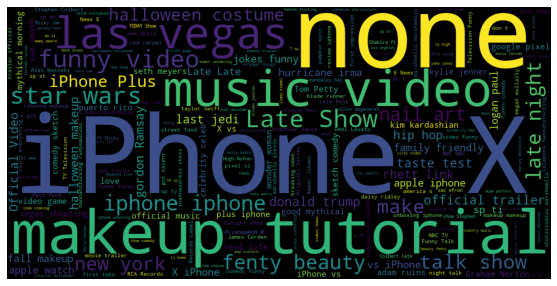

In [36]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Regression Plot for views & likes

Text(0.5, 1.0, 'Regression plot for views & likes')

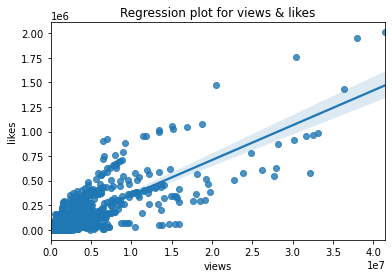

In [37]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

Regression Plot for views & dislikes

Text(0.5, 1.0, 'Regression plot for views & dislikes')

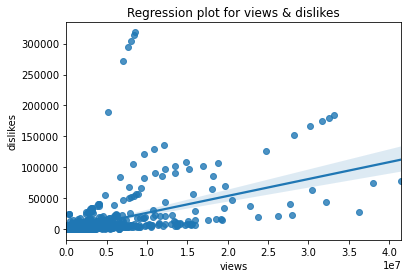

In [38]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

In [39]:
df_corr=videos[['views','likes','dislikes']]

In [40]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

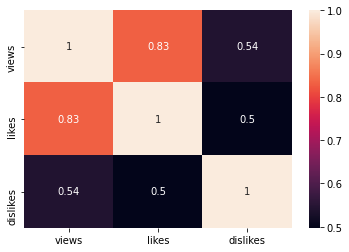

In [41]:
sns.heatmap(df_corr.corr(),annot=True)